## Task 1. Create a human mobility network for MA using the provided csv file.          
### network node: individual census block group (neighborhood) in MA
### network edge: residents from one neighborhood visiting another
### weight of network tie: percentage of residents from one neighborhood visiting another         

In [1]:
import networkx as nx
import pandas as pd

df = pd.read_csv('MA_cbg2cbg_2019_01.csv')
df.head()

G = nx.Graph()

for i in range(len(df)):
    orig = df.loc[i, 'poi_cbg']
    dest = df.loc[i, 'visitor_census_tract']
    tot_res_orig = df.loc[i, 'raw_device_counts']
    visits = df.loc[i, 'visitor_count']
    per_visit = visits / tot_res_orig
    
    G.add_edge(orig, dest, weight=per_visit)

print(nx.info(G))

Graph with 40292 nodes and 742299 edges


C:\Users\sain4\AppData\Local\Temp\ipykernel_24148\1779948260.py:18: DeprecationWarning: info is deprecated and will be removed in version 3.0.

  print(nx.info(G))


### 40,292 nodes & 742,299 edges

## Task 2. Calculate weighted node degree and unweighted node degree for each census block group in the mobility network and use the results to create a pandas dataframe. The dataframe should have three columns. One column stores the census block group id, and the other two the two calculated node degrees. 

In [2]:
humbol = pd.DataFrame(data=G.degree(), columns=['Block_Group_ID', 'Degree'])
humbolw = pd.DataFrame(data=G.degree(weight="weight"), columns=['Block_Group_ID', 'Weighted_Degree'])

humbol = humbol.merge(humbolw, on='Block_Group_ID', how='left')
humbol

,Block_Group_ID,Degree,Weighted_Degree
0,250250303003,2936,1.617298
1,250251010016,609,1.829781
2,440070008003,77,0.201907
3,250250923002,600,2.675362
4,250173686001,3217,1.763752
...,...,...,...
40287,170318261003,1,0.000726
40288,120310144111,1,0.000726
40289,530330294073,1,0.000726
40290,360610165001,1,0.000726


## Task 3. Create a plot that visualizes the distribution of the weighted node degrees. Is the human mobility network a scale-free network? In other words, does the degree distribution follow a power law? 

<AxesSubplot: >

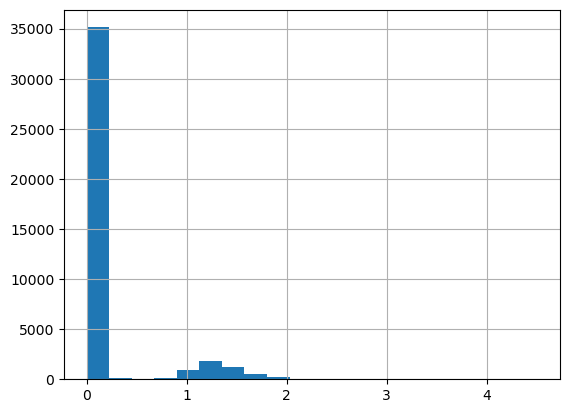

In [3]:
humbol.Weighted_Degree.hist(bins=20)

<AxesSubplot: >

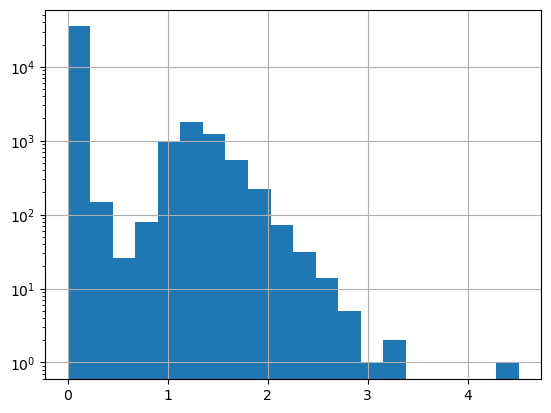

In [4]:
humbol.Weighted_Degree.hist(bins=20, log=True)

Calculating best minimal value for power law fit


<AxesSubplot: >

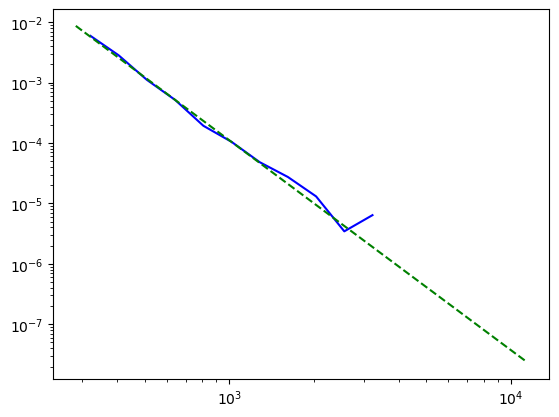

In [5]:
import powerlaw # need to pip install powerlaw

degseq = sorted([deg for k, deg in G.degree()], reverse=True)
fit = powerlaw.Fit(degseq)

fig = fit.plot_pdf(color='b')
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig)

### scale-free network: logarithmic histogram above shows negative linear decline, suggestive of exponential decline. After installing powerlaw module, can use powerlaw chart to see the data seems to follow quite closely the power-law

## Explores "six degrees of separation" by two different approaches. Checking all pair lengths mean 1.6 x 10^9 operations (time-intensive!). Method 1 checks the path length of randomly selected nodes against all other nodes, returning a dictionary of all path lengths. Method 2 finds the max shortest path length for every node against all other nodes, returnign a dictionary of max path lengths. Given scale of operations, method 1 runs considerably faster

1. Checked all pairs of node 250173834004

2. Checked all pairs of node 250277281002

3. Checked all pairs of node 250138111012

4. Checked all pairs of node 250235105023

5. Checked all pairs of node 90117131001

6. Checked all pairs of node 420710115034

7. Checked all pairs of node 420110001001

8. Checked all pairs of node 360379511002

9. Checked all pairs of node 391690019002

10. Checked all pairs of node 370499613021

11. Checked all pairs of node 230099663003

12. Checked all pairs of node 360910618002

13. Checked all pairs of node 110010040013

14. Checked all pairs of node 470370139001

15. Checked all pairs of node 120710105023

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000
25000
26000
27000
28000
29000
30000
31000
32000
33000
34000
35000
36000
37000
38000
39000
40000
{1: 1216, 2: 91174, 0: 15, 3: 342190, 4: 169241, 5: 544}
{3: 6, 4: 14913, 5: 17198, 6: 1}


<BarContainer object of 4 artists>

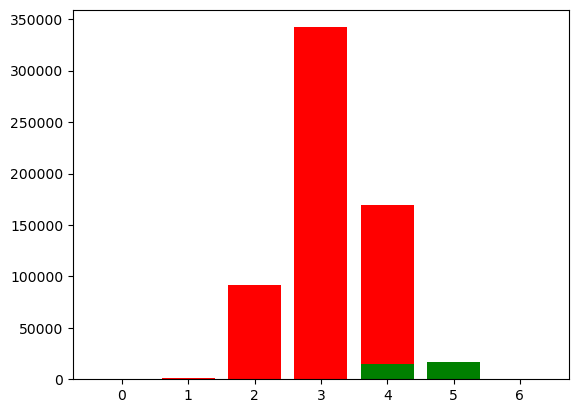

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from random import sample


# 40,292 nodes -- checking each pair is ~1.6*10^9 calculations (i.e. exceedingly long). Instead, let's use 
# two methods:

# Sample_Graph_Check: to save time, samples 15 (or however much desired) random nodes against all other nodes, returning
# all path lengths

def sample_graph_check(g1):
    degsep_dict = {}

    rand_rows = sample(range(0, len(g1.nodes())), 15)
    counter = 0
    
    for row, i in enumerate(g1.nodes()):
        if any(item == row for item in rand_rows):
            for row2, j in enumerate(g1.nodes()):
                temp = nx.shortest_path_length(g1, source=i, target=j)
                if not np.isnan(temp):
                    if temp not in degsep_dict.keys():
                        degsep_dict[temp] = 1
                    else:
                        degsep_dict[temp] += 1
            counter += 1
            print(f"{counter}. Checked all pairs of node {i}\n")
            
    return degsep_dict

# Full_Graph_Check: time-intensive. Returns shortest path lengths from a source node to all other nodes, then finds the maximum
# length. Checks every node as a source node and returns a dictionary of max lengths

def full_graph_check(g1):
    degsep_dict = {}
    
    for row, i in enumerate(g1.nodes()):
        path=nx.single_source_shortest_path(g1, i)
        temp_max = max([len(x) for x in list(path.values())])
        if temp_max not in degsep_dict.keys():
            degsep_dict[temp_max-1] = 1
        else:
            degsep_dict[temp_max-1] += 1
        if row%1000 == 0:
            print(row)
    
    return degsep_dict

sample_degree_dict = sample_graph_check(G) 
max_degree_dict = full_graph_check(G) # comment to run quicker
print(sample_degree_dict)
print(max_degree_dict)

plt.bar(sample_degree_dict.keys(), sample_degree_dict.values(), color='r')
plt.bar(max_degree_dict.keys(), max_degree_dict.values(), color='g')

### Yes, no shortest path exceeds 6 steps